In [1]:
import numpy as np
import matplotlib.pyplot as plt

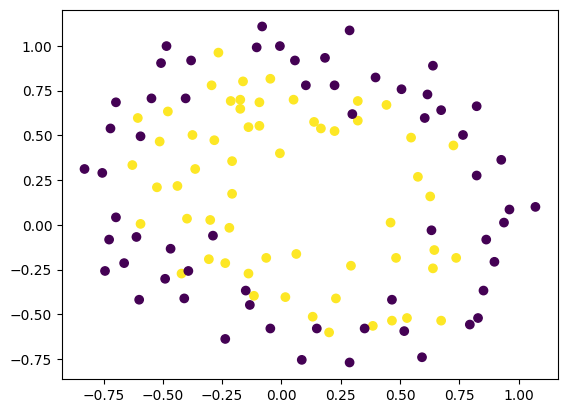

In [2]:
data = np.loadtxt("ex2data2.csv", delimiter=",")
x_train = data[:, :2]
y_train = data[:, 2]
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.show()

In [3]:
def map_feature(x):
    x1 = x[:, 0]
    x2 = x[:, 1]
    features = []
    for i in range(1, 7):
        for j in range(i + 1):
            features.append((x1 ** (i - j) * (x2 ** j)))
    return np.stack(features, axis=1)

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def model(x, w, b):
    return sigmoid(np.dot(x, w) + b)


def cost(x, y, w, b, lambda_=1):
    m = x.shape[0]
    f = model(x, w, b)
    loss = -y * np.log(f) - (1 - y) * np.log(1 - f)
    cost = np.sum(loss) / m + np.sum(np.square(w)) * lambda_ / (2 * m)
    return cost


def gradient(x, y, w, b, lambda_=1):
    m, n = x.shape
    f = model(x, w, b)
    dj_dw = np.sum((f - y)[:, np.newaxis] * x, axis=0) / m + lambda_ * w / m
    dj_db = np.sum(f - y) / m
    return dj_dw, dj_db


def plot_contour(x_train, y_train, w, b, x1_range, x2_range):
    x1_plot, x2_plot = np.meshgrid(x1_range, x2_range)
    x_plot = np.column_stack((x1_plot.flatten(), x2_plot.flatten()))
    x_mapped = map_feature(x_plot)
    y_predicted = model(x_mapped, w, b)
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
    contour = plt.contour(x1_plot, x2_plot, y_predicted.reshape(x1_plot.shape))
    plt.clabel(contour, inline=True)
    plt.show()


def gradient_descent(x, y, alpha, iterations):
    m, n = x.shape
    w = np.zeros(n)
    b = 0
    costs = []
    for i in range(iterations):
        dj_dw, dj_db = gradient(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        costs.append(cost(x, y, w, b))
        if i % (iterations // 5) == 0:
            plot_contour(x, y, w, b, np.arange(-1, 1, 0.01), np.arange(-1, 1, 0.01))
            print(f"iteration #{i}, w = {w}, b = {b}, cost = {costs[-1]}")
    return w, b, costs

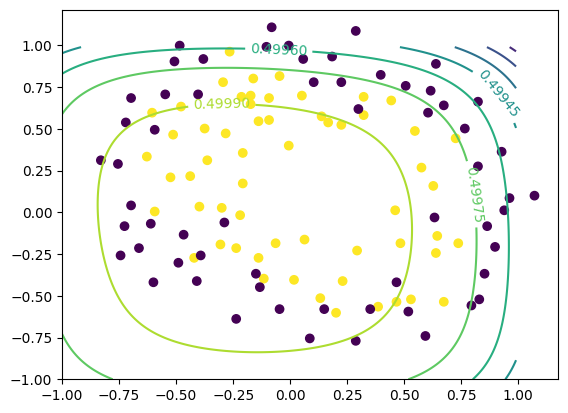

iteration #0, w = [-1.87880932e-04 -7.77711864e-07 -5.03446395e-04 -1.15013308e-04
 -3.76648474e-04 -1.83559872e-04 -7.32393391e-05 -8.19244468e-05
 -2.34764889e-04 -3.93486234e-04 -2.23923907e-05 -1.28600503e-04
 -3.09593720e-05 -3.93028171e-04 -1.99707467e-04 -4.32983232e-05
 -3.38643902e-05 -5.83822078e-05 -4.47629067e-05 -3.10079849e-04
 -3.10312442e-04 -1.09740238e-05 -6.31570797e-05 -4.08503006e-06
 -7.26504316e-05 -1.37646175e-05 -3.87936363e-04], b = -8.474576271186441e-05, cost = 0.6930192686143132


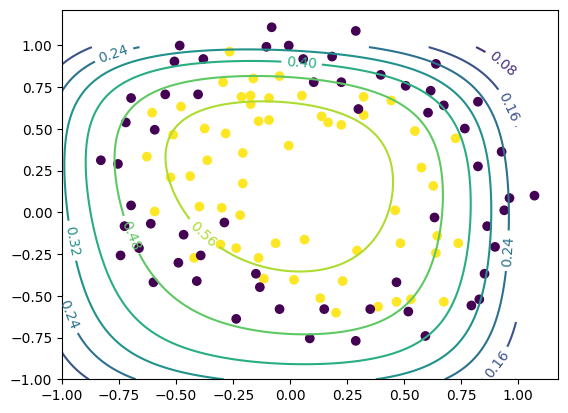

iteration #2000, w = [-0.00109175  0.2950371  -0.63268424 -0.18199286 -0.35509109 -0.10245969
 -0.08556908 -0.09560728 -0.1464823  -0.50331928 -0.02237265 -0.17044299
 -0.04635503 -0.41849724 -0.1770675  -0.05668929 -0.0325215  -0.07381752
 -0.06299315 -0.28450714 -0.38674593 -0.00564916 -0.08661164 -0.00125373
 -0.09537953 -0.02015757 -0.41515062], b = 0.3885446926854567, cost = 0.5964354223087347


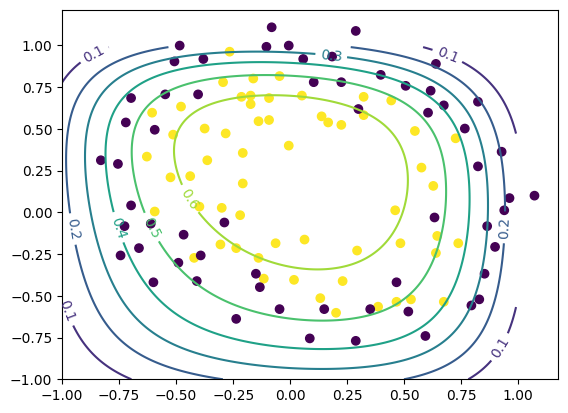

iteration #4000, w = [ 1.55401364e-01  5.58284214e-01 -1.02702240e+00 -3.21807029e-01
 -5.77004083e-01 -7.11032205e-02 -1.47232526e-01 -1.52244213e-01
 -1.77049208e-01 -7.97755629e-01 -3.38820016e-02 -2.84502193e-01
 -8.35636312e-02 -6.46304255e-01 -2.22338149e-01 -9.61042135e-02
 -4.49007804e-02 -1.22989708e-01 -1.08496621e-01 -3.95922528e-01
 -5.99537271e-01 -4.28034965e-03 -1.43291743e-01 -3.72835478e-04
 -1.56843977e-01 -3.74212231e-02 -6.18896400e-01], b = 0.6493983189886854, cost = 0.5628024395615095


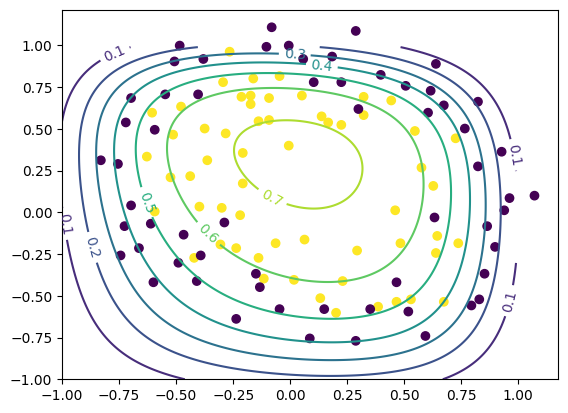

iteration #6000, w = [ 2.84236287e-01  7.39760072e-01 -1.29808559e+00 -4.41263578e-01
 -7.49599423e-01 -3.02478194e-02 -1.97089907e-01 -1.98519351e-01
 -1.87684137e-01 -9.92845513e-01 -4.41746078e-02 -3.67436875e-01
 -1.18667133e-01 -7.99073164e-01 -2.38649246e-01 -1.26006235e-01
 -5.22918253e-02 -1.59629192e-01 -1.46930608e-01 -4.52604302e-01
 -7.36441165e-01 -2.86714440e-03 -1.83492757e-01 -2.19064497e-04
 -2.00620614e-01 -5.51024189e-02 -7.41487865e-01], b = 0.8166396171691268, cost = 0.5468373216634625


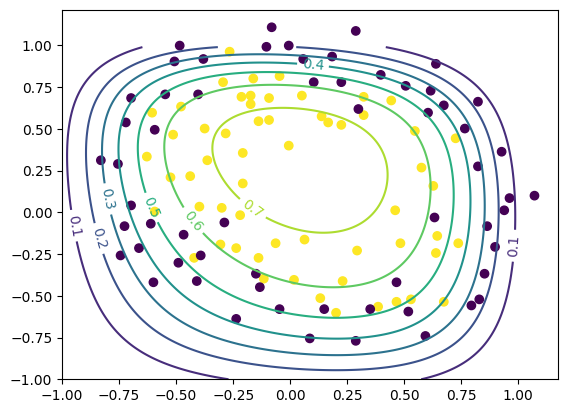

iteration #8000, w = [ 3.77115799e-01  8.64704557e-01 -1.48865683e+00 -5.40758854e-01
 -8.86083976e-01  4.69102720e-03 -2.36635763e-01 -2.36641877e-01
 -1.91117120e-01 -1.12646939e+00 -5.26554426e-02 -4.28677993e-01
 -1.49723014e-01 -9.06218583e-01 -2.44913182e-01 -1.48485217e-01
 -5.69416915e-02 -1.87273966e-01 -1.78868233e-01 -4.81965824e-01
 -8.28427317e-01 -1.41300703e-03 -2.12512675e-01 -2.03400722e-04
 -2.32515514e-01 -7.14914284e-02 -8.18613359e-01], b = 0.9333711736538567, cost = 0.5387219816147196


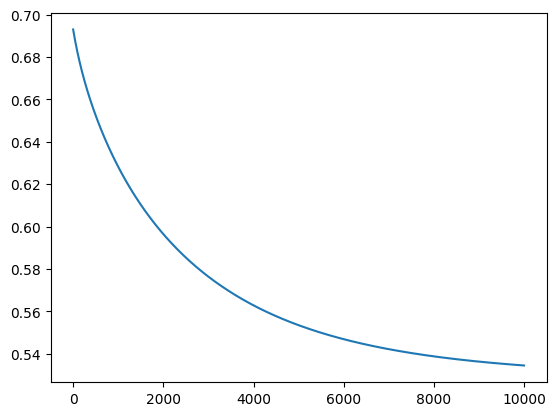

w = [ 4.43195884e-01  9.52036236e-01 -1.62491923e+00 -6.21366553e-01
 -9.94547287e-01  3.25486613e-02 -2.67509056e-01 -2.67171844e-01
 -1.91241027e-01 -1.21974336e+00 -5.88885147e-02 -4.74324697e-01
 -1.75802478e-01 -9.82886112e-01 -2.46886003e-01 -1.65203476e-01
 -5.96279358e-02 -2.08232656e-01 -2.04751951e-01 -4.96074259e-01
 -8.91622482e-01  2.93091879e-04 -2.33670040e-01  4.37328790e-05
 -2.56047034e-01 -8.56889956e-02 -8.67719051e-01], b = 1.0175123621955375


In [5]:
mapped_x = map_feature(x_train)
w, b, costs = gradient_descent(mapped_x, y_train, 0.01, 10000)
plt.plot(costs)
plt.show()
print(f"w = {w}, b = {b}")

In [6]:
y_predicted = np.where(model(mapped_x, w, b) > 0.5, 1, 0)
print(f"Accuracy = {np.mean(y_predicted == y_train)}")

Accuracy = 0.8305084745762712
